In [1]:
import pandas as pd
import numpy as np
import os
from utils import *



import file_config as fc
fig_save_path = os.path.join(fc.ROOT_DIR,'csi500')

In [3]:
df = pd.read_parquet(os.path.join(fc.BARR_DIR,'BarraFactorCov_Raw.parquet'))
df


,Country,Beta,Momentum,Size,EarningsYield,ResidualVolatility,Growth,BooktoPrice,Leverage,Liquidity,...,Transport,BasicChemicals,Coal,ElectricalEquipment,DefenseMilitary,NonBankFinance,Steel,Media,Date,FactorIdx
0,2.326533e-04,3.761381e-05,4.595142e-06,-5.003213e-07,-3.099396e-06,0.000016,2.272375e-06,2.046663e-06,1.625393e-06,4.314284e-06,...,7.861694e-06,1.724701e-05,6.217182e-05,0.000002,3.300937e-05,7.474491e-06,1.274683e-05,-0.000010,20110119,1
1,3.761381e-05,9.268211e-06,9.179366e-07,1.858295e-06,-7.655585e-07,0.000001,8.237814e-07,1.398266e-06,9.116131e-07,4.319424e-07,...,3.305031e-06,2.705635e-06,1.577228e-05,-0.000002,4.821082e-06,3.725391e-06,4.699173e-06,-0.000002,20110119,2
2,4.595142e-06,9.179366e-07,1.663112e-05,3.342405e-06,-1.835190e-06,-0.000003,-9.388376e-07,3.000469e-06,1.572543e-06,-6.523086e-07,...,7.765789e-07,2.886183e-07,9.628336e-06,-0.000006,-3.390543e-07,3.243972e-06,6.535946e-07,-0.000005,20110119,3
3,-5.003213e-07,1.858295e-06,3.342405e-06,8.498207e-06,-1.417577e-06,-0.000004,1.867902e-07,3.028272e-06,1.393260e-06,-4.745415e-07,...,2.000609e-06,-3.104860e-06,1.429528e-05,-0.000010,-1.242061e-05,9.543214e-06,5.539123e-06,-0.000009,20110119,4
4,-3.099396e-06,-7.655585e-07,-1.835190e-06,-1.417577e-06,2.511753e-06,0.000002,9.383777e-08,-6.648707e-07,-8.144969e-07,1.059386e-07,...,-1.427544e-06,-6.800784e-07,3.574615e-08,0.000002,-3.404528e-06,-2.638164e-08,-1.166256e-06,0.000003,20110119,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133635,-8.540190e-06,-5.563393e-06,-7.162231e-06,2.309277e-06,1.645663e-06,-0.000002,8.372727e-07,-3.680617e-06,5.407099e-07,-8.073866e-07,...,9.627604e-07,1.447529e-05,-2.860565e-06,0.000060,1.448525e-05,-9.085662e-06,-6.503063e-06,-0.000008,20241023,36
133636,3.795517e-07,4.986698e-06,1.452815e-06,-6.967144e-06,1.048522e-06,0.000006,3.994173e-07,-2.790707e-07,5.826658e-07,2.291572e-06,...,7.993068e-06,-2.742174e-06,-1.075621e-05,0.000014,1.074452e-04,-7.451790e-06,-2.983543e-06,-0.000006,20241023,37
133637,1.154888e-04,3.203919e-05,-1.264762e-05,1.579284e-05,-3.149231e-07,0.000019,1.498107e-06,-2.618282e-06,-1.317508e-05,-6.252014e-06,...,-1.400609e-05,-2.616148e-05,-5.696804e-05,-0.000009,-7.451790e-06,1.305637e-04,-1.005069e-05,-0.000021,20241023,38
133638,-3.319197e-05,-2.654947e-05,1.406313e-06,3.412216e-06,6.788120e-06,-0.000006,-2.477234e-08,4.924681e-06,4.593061e-06,3.912208e-07,...,1.133877e-05,1.535165e-05,3.659897e-05,-0.000007,-2.983543e-06,-1.005069e-05,4.966584e-05,0.000006,20241023,39


In [4]:
da = pd.read_parquet(os.path.join(fc.BARR_DIR,'BarraFactorTable.parquet'))
da

,Date,Symbol,Country,Beta,Momentum,Size,EarningsYield,ResidualVolatility,Growth,BooktoPrice,...,Architecture,Computers,Transport,BasicChemicals,Coal,ElectricalEquipment,DefenseMilitary,NonBankFinance,Steel,Media
0,20091231,000001.SZ,1.0,0.109913,-0.024910,0.582245,3.060544,0.175831,2.477932,-0.304816,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,20091231,000002.SZ,1.0,0.456793,-0.142601,1.009899,1.653027,0.063510,-1.192288,0.359050,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,20091231,000004.SZ,1.0,-1.605814,0.859806,-3.681863,-1.704493,-0.476910,-1.190481,-1.281172,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20091231,000005.SZ,1.0,0.275301,0.213207,-1.900713,-0.868788,0.312563,-0.053559,-1.054983,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,20091231,000006.SZ,1.0,1.431036,-0.041272,-1.859936,-0.868788,-0.278730,-0.053559,0.262162,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12186030,20241023,920008.BJ,1.0,0.647759,-0.626850,-2.609125,-0.828533,-0.447364,0.332289,-0.392941,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12186031,20241023,920016.BJ,1.0,0.647759,-0.626850,-2.920917,-0.828533,-0.539241,0.332289,-0.392941,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12186032,20241023,920019.BJ,1.0,0.647759,-0.626850,-2.119639,-0.828533,-0.303126,0.332289,-0.392941,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12186033,20241023,920099.BJ,1.0,0.647759,-0.626850,-3.050398,-0.828533,-0.577396,0.332289,-0.392941,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
index = pd.read_parquet(os.path.join(fc.BARR_DIR,'idx__csi500_weight.parquet'))
# index = index.pivot_table(index='Date',columns='Symbol',values='Weight')
# index.index = pd.to_datetime(index.index, format='%Y%m%d')
index = index[index.Date.astype(int) >= 20190101]
# index.dropna(axis=1)
index['Symbol'].nunique()

968

In [4]:
def get_index_price(index:str, start_date:str, end_date:str, field:str='close'):
    index_list = ['000300.SH', '000905.SH', '000852.SH', '000985.SH']
    if index not in index_list:
        print(f'pleace select from {index_list}')
    
    index = pd.read_csv(f'{index}.csv')[['ts_code', 'trade_date', field]]
    index['trade_date'] = pd.to_datetime(index['trade_date'], format='%Y%m%d')
    index = index.loc[(index.trade_date >= start_date) & (index.trade_date <= end_date), ['ts_code','trade_date', 'close']]
    return index.pivot(index='trade_date', columns='ts_code', values=field)

index_price = get_index_price('000905.SH', '2019-01-01', '2025-01-01')
index_price

ts_code,000905.SH
trade_date,
2019-01-02,4131.9567
2019-01-03,4112.8070
2019-01-04,4210.8786
2019-01-07,4288.3234
2019-01-08,4277.2967
...,...
2024-10-22,5753.8497
2024-10-23,5776.3830
2024-10-24,5726.7041


Text(0.5, 1.0, 'CSI500 No. of Stocks')

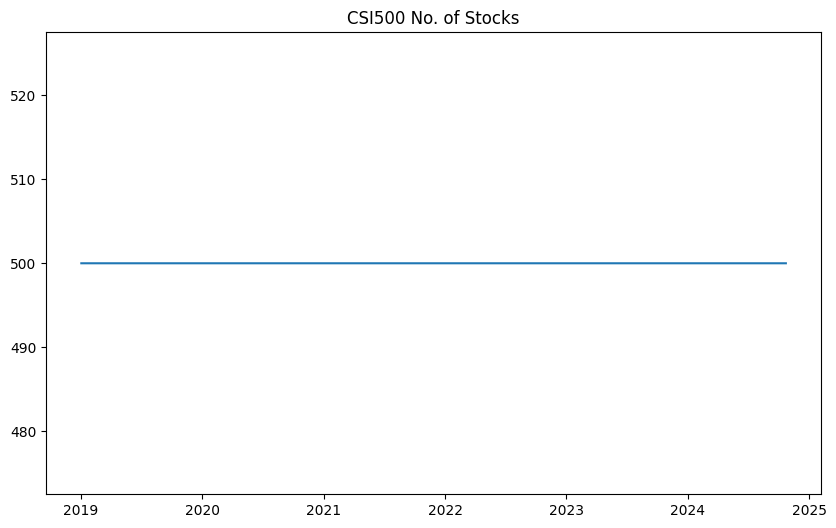

In [115]:
fig = plt.figure(figsize=(10,6))
plt.plot(index.count(axis=1),label='index')
plt.title('CSI500 No. of Stocks')



In [126]:
def get_buy_list(df,top_type = 'rank',rank_n = 100,quantile_q = 0.8):
    """
    :param df: 因子值 -> dataframe/unstack
    :param top_tpye: 选择买入队列方式，从['rank','quantile']选择一种方式 -> str
    :param rank_n: 值最大的前n只的股票 -> int
    :param quantile_q: 值最大的前n分位数的股票 -> float
    :return df: 买入队列 -> dataframe/unstack
    """
    if top_type == 'rank':
        df = df.rank(axis  = 1,ascending=False) <= rank_n
    elif top_type == 'quantile':
        df = df.sub(df.quantile(quantile_q,axis = 1),axis = 0) > 0
    else:
        print("select one from ['rank','quantile']")

    df = df.astype(int)
    df = df.replace(0,np.nan).dropna(how = 'all',axis = 1)
    
    return df


In [121]:
df_xgb = pd.read_parquet('prediction_xgb_outsample.parquet')
df_xgb = df_xgb.pivot_table(index='Date',columns='Symbol',values='pred')

In [131]:
df_xgb[df_xgb.index == '2012-04-10'].T.sort_values('2012-04-10',ascending=False).head(10)

Date,2012-04-10
Symbol,
000971.SZ,0.009273
300309.SZ,0.003485
600016.SH,0.003415
601258.SH,0.003415
000498.SZ,0.003415
002096.SZ,0.003415
002093.SZ,0.003415
002051.SZ,0.003415
600675.SH,0.003415


<Axes: xlabel='Date'>

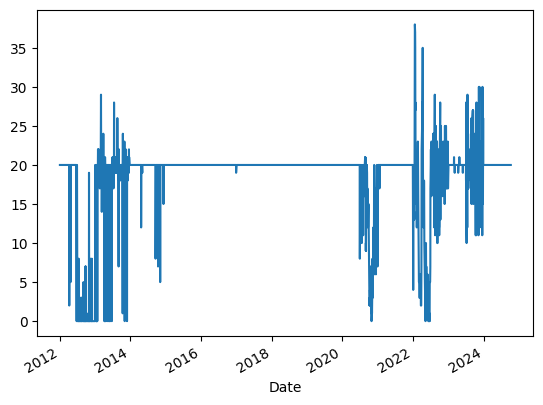

In [ ]:
buy_list = get_buy_list(df_xgb,rank_n=20) <= 20
buy_list.astype(int).sum(axis=1).plot()

In [ ]:


buy_list

# calculate turnover

def get_turnover(buy_list, change_n):
    turnover_dict = {}

    for i, day in enumerate(buy_list.index,1):
        if day == buy_list.index[0]:
            temp_list = buy_list.loc[day]
        else:
            if i % change_n == 0:
                turnover = len(set(buy_list.loc[day].dropna().index).difference(set(temp_list.dropna().index)))/len(temp_list.dropna().index)
                turnover_dict[day] = turnover
                temp_list = buy_list.loc[day]
            
    return turnover_dict

turnover_dict = get_turnover(buy_list,20)



In [102]:
turnover_dict

{Timestamp('2012-02-07 00:00:00'): 1.0,
 Timestamp('2012-03-06 00:00:00'): 1.0,
 Timestamp('2012-04-06 00:00:00'): 1.0,
 Timestamp('2012-05-08 00:00:00'): 1.0,
 Timestamp('2012-06-05 00:00:00'): 0.95,
 Timestamp('2012-07-04 00:00:00'): 1.0,
 Timestamp('2012-08-01 00:00:00'): 0.3,
 Timestamp('2012-08-29 00:00:00'): 0.25,
 Timestamp('2012-09-26 00:00:00'): 0.9,
 Timestamp('2012-10-31 00:00:00'): 0.95,
 Timestamp('2012-11-28 00:00:00'): 0.95,
 Timestamp('2012-12-26 00:00:00'): 0.85,
 Timestamp('2013-01-28 00:00:00'): 1.0,
 Timestamp('2013-03-04 00:00:00'): 1.0,
 Timestamp('2013-04-01 00:00:00'): 1.0,
 Timestamp('2013-05-06 00:00:00'): 0.95,
 Timestamp('2013-06-03 00:00:00'): 1.0,
 Timestamp('2013-07-04 00:00:00'): 1.0,
 Timestamp('2013-08-01 00:00:00'): 1.0,
 Timestamp('2013-08-29 00:00:00'): 0.9,
 Timestamp('2013-09-30 00:00:00'): 1.0,
 Timestamp('2013-11-04 00:00:00'): 1.0,
 Timestamp('2013-12-02 00:00:00'): 1.0,
 Timestamp('2013-12-30 00:00:00'): 1.0,
 Timestamp('2014-01-28 00:00:00'):

In [103]:
turnover_df = pd.DataFrame.from_dict(turnover_dict,orient='index',columns=['turnover'])

In [108]:
turnover_df

,turnover
2012-02-07,1.00
2012-03-06,1.00
2012-04-06,1.00
2012-05-08,1.00
2012-06-05,0.95
...,...
2024-05-14,1.00
2024-06-12,0.95
2024-07-10,1.00
2024-08-07,0.95


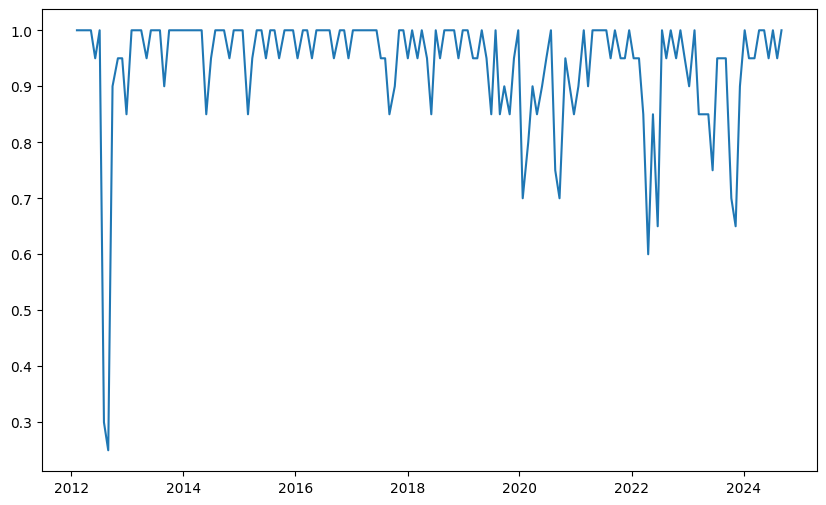

In [107]:
fig = plt.figure(figsize=(10,6))

plt.plot(turnover_df.index,turnover_df['turnover'])
plt.title('Turnover')
plt.s
